In [18]:
import numpy as np
import xarray as xr

In [13]:
# reg = 'glm.n1280_GAL9_nest'
reg = 'Africa_km4p4_RAL3P3.n1280_GAL9_nest'
url = f'https://hackathon-o.s3-ext.jc.rl.ac.uk/sim-data/dev/{reg}/data.healpix.2d.v2.z10.zarr'

In [14]:
ds = xr.open_zarr(url)

In [15]:
ds

<xarray.Dataset> Size: 13TB
Dimensions:  (cell: 12582912, time: 10489)
Coordinates:
  * cell     (cell) int64 101MB 0 1 2 3 ... 12582908 12582909 12582910 12582911
    crs      float64 8B ...
  * time     (time) datetime64[ns] 84kB 2020-01-20 ... 2021-04-01
Data variables: (12/24)
    clivi    (time, cell) float32 528GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    clt      (time, cell) float32 528GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    clwvi    (time, cell) float32 528GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    hflsd    (time, cell) float32 528GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    hfssd    (time, cell) float32 528GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    huss     (time, cell) float32 528GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    ...       ...
    rsut     (time, cell) float32 528GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    rsutcs   (time, cell) float32 528GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    tas      (time, cell) float32 528GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    ts       (time, cell) float32 528GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    uas      (time, cell) float32 528GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    vas      (time, cell) float32 528GB dask.array<chunksize=(1, 1048576), meta=np.ndarray>
Attributes:
    Met Office DYAMOND3 simulations:  A group of experiments have been conduc...
    bounds:                           {'lower_left_lat': -90, 'lower_left_lon...
    latitiude_convention:             [-90, 90]
    longitude_convention:             [0, 360]
    regional:                         False
    simulation:                       glm.n1280_GAL9_nest

In [16]:
tas = ds.tas

In [20]:
np.isnan(tas.isel(time=0).values).sum()

np.int64(1799)

In [21]:
import healpix as hp

In [22]:
zoom = 10
nside = hp.order2nside(zoom)
npix = hp.nside2npix(nside)
hp_lon, hp_lat = hp.pix2ang(nside, np.arange(npix), nest=True, lonlat=True)

In [76]:
hp_lon = hp_lon % 360
hp_lon[hp_lon == 0] = 360

In [23]:
m = np.isnan(tas.isel(time=0).values)

In [24]:
hp_lon[m]

array([4.39453125e-02, 4.39882698e-02, 4.40313112e-02, ...,
       1.35000000e+02, 2.25000000e+02, 3.15000000e+02])

In [25]:
hp_lat[m]

array([ 41.8103149 ,  41.86035581,  41.91038697, ..., -89.95431464,
       -89.95431464, -89.95431464])

In [26]:
import matplotlib.pyplot as plt

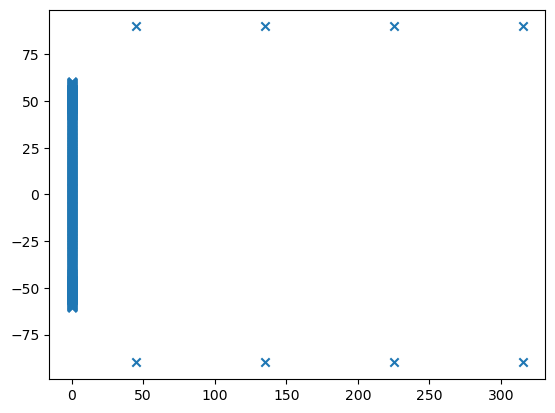

In [31]:
plt.scatter(hp_lon[m], hp_lat[m], marker='x');

In [33]:
hp_lon[m].min()

np.float64(0.0439453125)

In [34]:
import iris

In [37]:
path = '/gws/nopw/j04/kscale/DYAMOND3_example_data/sample_data_hirerarchy/10km-GAL9-nest/glm/field.pp/apvera.pp/glm.n1280_GAL9_nest.apvera_20200120T00.pp'
cubes = iris.load(path)
cube = cubes.extract_cube('air_temperature')

In [38]:
da = xr.DataArray.from_iris(cube)

/tmp/ipykernel_3610/2923342.py:1: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  da = xr.DataArray.from_iris(cube)


In [39]:
da

<xarray.DataArray 'air_temperature' (time: 13, latitude: 1920, longitude: 2560)> Size: 256MB
dask.array<filled, shape=(13, 1920, 2560), dtype=float32, chunksize=(1, 1920, 2560), chunktype=numpy.ndarray>
Coordinates:
  * time                     (time) datetime64[ns] 104B 2020-01-20T00:04:00 ....
  * latitude                 (latitude) float32 8kB -89.95 -89.86 ... 89.95
  * longitude                (longitude) float32 10kB 0.07031 0.2109 ... 359.9
    forecast_reference_time  datetime64[ns] 8B ...
    height                   float64 8B ...
    forecast_period          (time) timedelta64[ns] 104B ...
Attributes:
    standard_name:  air_temperature
    units:          K
    source:         Data from Met Office Unified Model
    um_version:     13.5
    STASH:          m01s03i236

In [44]:
np.diff(da.longitude.values[[0, 1]])

array([0.140625], dtype=float32)

In [65]:
minlon, maxlon = da.longitude.values[[0, -1]]

In [50]:
minlat, maxlat = da.latitude.values[[0, -1]]

In [63]:
len(hp_lat[m][hp_lat[m] > maxlat])

4

In [64]:
len(hp_lat[m][hp_lat[m] < minlat])

4

In [66]:
len(hp_lon[m][hp_lon[m] < minlon])

1791

In [67]:
len(hp_lon[m][hp_lon[m] > maxlon])

0

In [70]:
(hp_lat > maxlat).sum()

np.int64(4)

In [71]:
(hp_lat < minlat).sum()

np.int64(4)

In [77]:
(hp_lon < minlon).sum()

np.int64(1791)

In [78]:
(hp_lon > maxlon).sum()

np.int64(2815)

In [79]:
maxlon

np.float32(359.9297)

In [80]:
hp_lon.max()

np.float64(360.0)

In [84]:
maxlon + np.diff(da.longitude.values)[-1]

np.float32(360.0703)

In [85]:
def find_hp_points_outside_domain(zoom, extent):
    nside = hp.order2nside(zoom)
    npix = hp.nside2npix(nside)
    hp_lon, hp_lat = hp.pix2ang(nside, np.arange(npix), nest=True, lonlat=True)
    hp_lon = hp_lon % 360
    hp_lon[hp_lon == 0] = 360
    return (hp_lon < extent[0]).sum() + (hp_lon > extent[1]).sum() + (hp_lat < extent[2]).sum() + (hp_lat > extent[3]).sum()

In [90]:
dlon = np.diff(da.longitude.values[[0, 1]])[0]
find_hp_points_outside_domain(10, [minlon - dlon, maxlon + dlon, minlat, maxlat])

np.int64(8)